In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Example Dataset

In [2]:
outlook = ['Sunny','Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild' ]
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
windy = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

categories = ['Outlook, Temperature', 'Humidity', 'Windy', 'Play']

df = pd.DataFrame({'Outlook':outlook, 'Temperature': temperature, 'Humidity':humidity, 'Windy':windy, 'Play':play})
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [3]:
x = OneHotEncoder(sparse_output=False)
x.set_output(transform="pandas")
X = x.fit_transform(df.drop('Play', axis=1))
onehot_categories = X.columns
X['Play'] = df['Play']
X

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True,Play
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Yes
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Yes
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Yes
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,No
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,Yes
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,No
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Yes
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes


In [4]:
crit = "gini"
tree = DecisionTreeClassifier(criterion=crit)
# tree = DecisionTreeClassifier(criterion="gini")
# tree = DecisionTreeClassifier(criterion="log_loss")


In [5]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=10)
X_train

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True,Play
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Yes
10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Yes
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,No
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Yes
13,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,No
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Yes
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes


In [6]:
tree.fit(X_train.drop('Play', axis=1), X_train['Play'])

DecisionTreeClassifier()

In [7]:
predicted = tree.predict(X_test.drop('Play', axis=1))
predicted_proba = tree.predict_proba(X_test.drop('Play', axis=1))
truth = np.array(X_test['Play'])
truth, predicted, predicted_proba

(array(['Yes', 'No', 'Yes', 'Yes', 'Yes'], dtype=object),
 array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

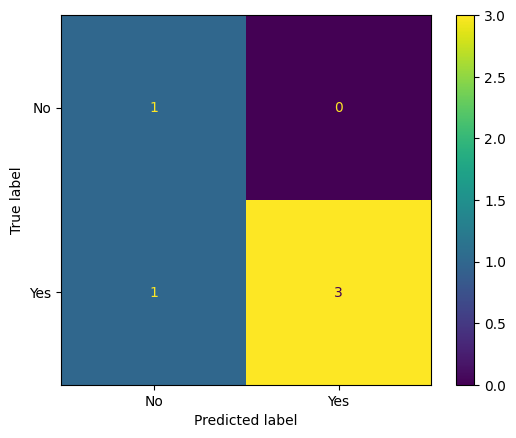

In [8]:
confusion = confusion_matrix(truth, predicted)
ConfusionMatrixDisplay.from_predictions(truth, predicted)
plt.savefig(f'Example_{crit}confusion')

In [9]:
report = classification_report(truth, predicted)
with open(f"example_{crit}report", 'w') as file:
    file.write(report)
print(report)

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [10]:
export_graphviz(tree, feature_names=onehot_categories, class_names=['No', 'Yes'], filled=True, rounded=True, proportion=False, precision=2, out_file=f"example_{crit}.dot")

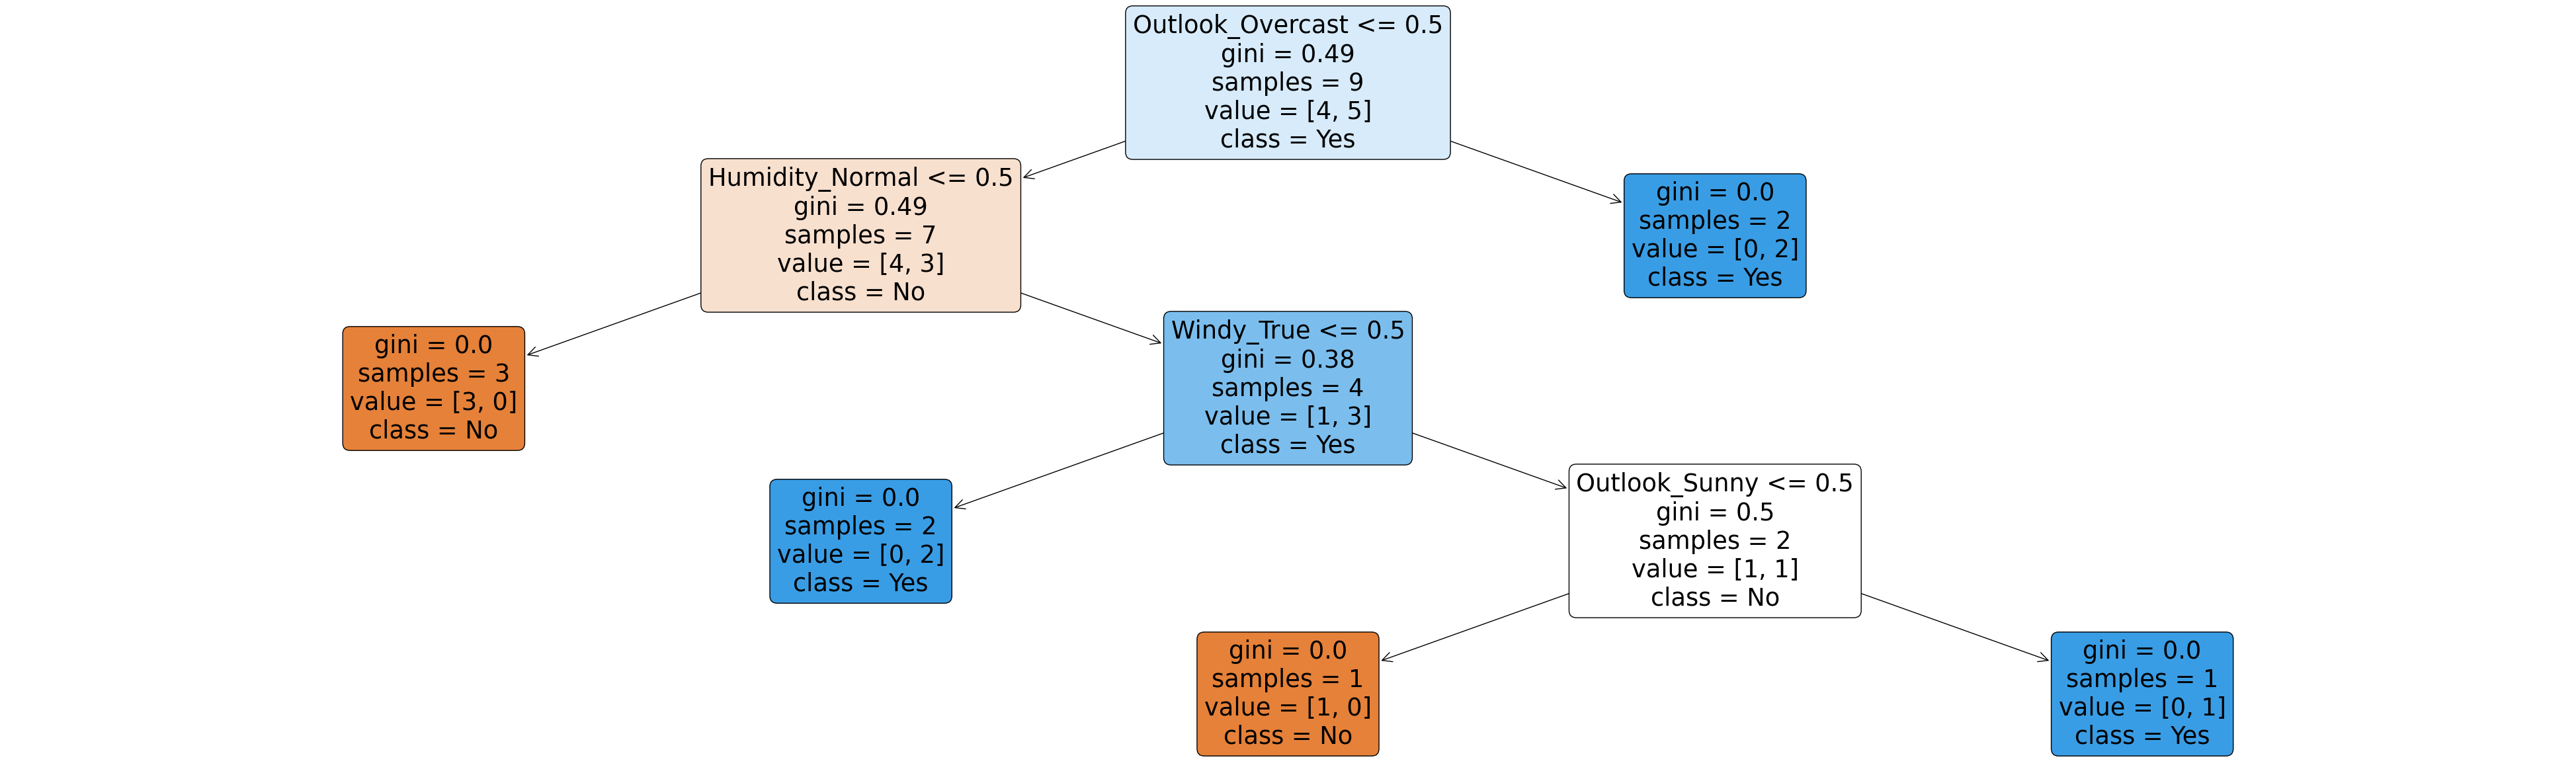

In [11]:
plt.figure(figsize=(50,15))
plot_tree(tree, feature_names=onehot_categories, class_names=['No', 'Yes'], filled=True, rounded=True, proportion=False, precision=2)
plt.show()

# Contraceptive Dataset

In [12]:
column_map = {0:'wife age', 1: 'wife_edu', 2:'husband_edu', 3:'#_children', 4:'wife_religion', 5:'wife_now_work', 6:'husband_occu', 7:'sol_index', 8:'media_expo', 9:'contraceptive_method'}
class_map = {1:'no use', 2:'long term', 3:'short term'}
df = pd.read_csv('contraceptive/cmc.data', header=None)
df.rename(columns=column_map, inplace=True)
df['contraceptive_method'] = df['contraceptive_method'].replace(class_map)
df

,wife age,wife_edu,husband_edu,#_children,wife_religion,wife_now_work,husband_occu,sol_index,media_expo,contraceptive_method
0,24,2,3,3,1,1,2,3,0,no use
1,45,1,3,10,1,1,3,4,0,no use
2,43,2,3,7,1,1,3,4,0,no use
3,42,3,2,9,1,1,3,3,0,no use
4,36,3,3,8,1,1,3,2,0,no use
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,short term
1469,33,4,4,3,1,1,1,4,0,short term
1470,39,3,3,8,1,0,1,4,0,short term
1471,33,3,3,4,1,0,2,2,0,short term


In [13]:
X_train, X_test = train_test_split(df, test_size=0.33, random_state=17)
X_test

,wife age,wife_edu,husband_edu,#_children,wife_religion,wife_now_work,husband_occu,sol_index,media_expo,contraceptive_method
1213,31,4,4,0,0,0,2,4,0,no use
224,47,4,4,4,1,1,1,4,0,no use
136,24,4,4,2,1,1,3,3,0,no use
1122,30,3,4,4,0,1,2,3,0,no use
117,44,3,4,1,1,1,1,3,0,no use
...,...,...,...,...,...,...,...,...,...,...
362,37,1,3,0,1,1,3,4,0,no use
552,29,4,4,3,1,0,3,3,0,long term
1359,29,2,4,4,1,1,3,2,0,short term
1206,47,1,2,2,1,1,2,4,0,no use


In [14]:
tree.fit(df.drop('contraceptive_method', axis=1), df['contraceptive_method'])

DecisionTreeClassifier()

In [15]:
predicted = tree.predict(X_test.drop('contraceptive_method', axis=1))
predicted_proba = tree.predict_proba(X_test.drop('contraceptive_method', axis=1))
truth = np.array(X_test['contraceptive_method'])

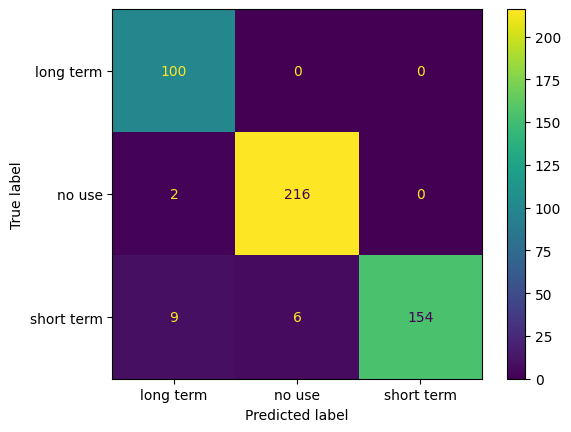

In [16]:
confusion = confusion_matrix(truth, predicted)
ConfusionMatrixDisplay.from_predictions(truth, predicted)
plt.savefig(f'Contraceptive_{crit}confusion')

In [17]:
report = classification_report(truth, predicted)
with open(f"contraceptive_{crit}report", 'w') as file:
    file.write(report)
print(report)

              precision    recall  f1-score   support

   long term       0.90      1.00      0.95       100
      no use       0.97      0.99      0.98       218
  short term       1.00      0.91      0.95       169

    accuracy                           0.97       487
   macro avg       0.96      0.97      0.96       487
weighted avg       0.97      0.97      0.97       487



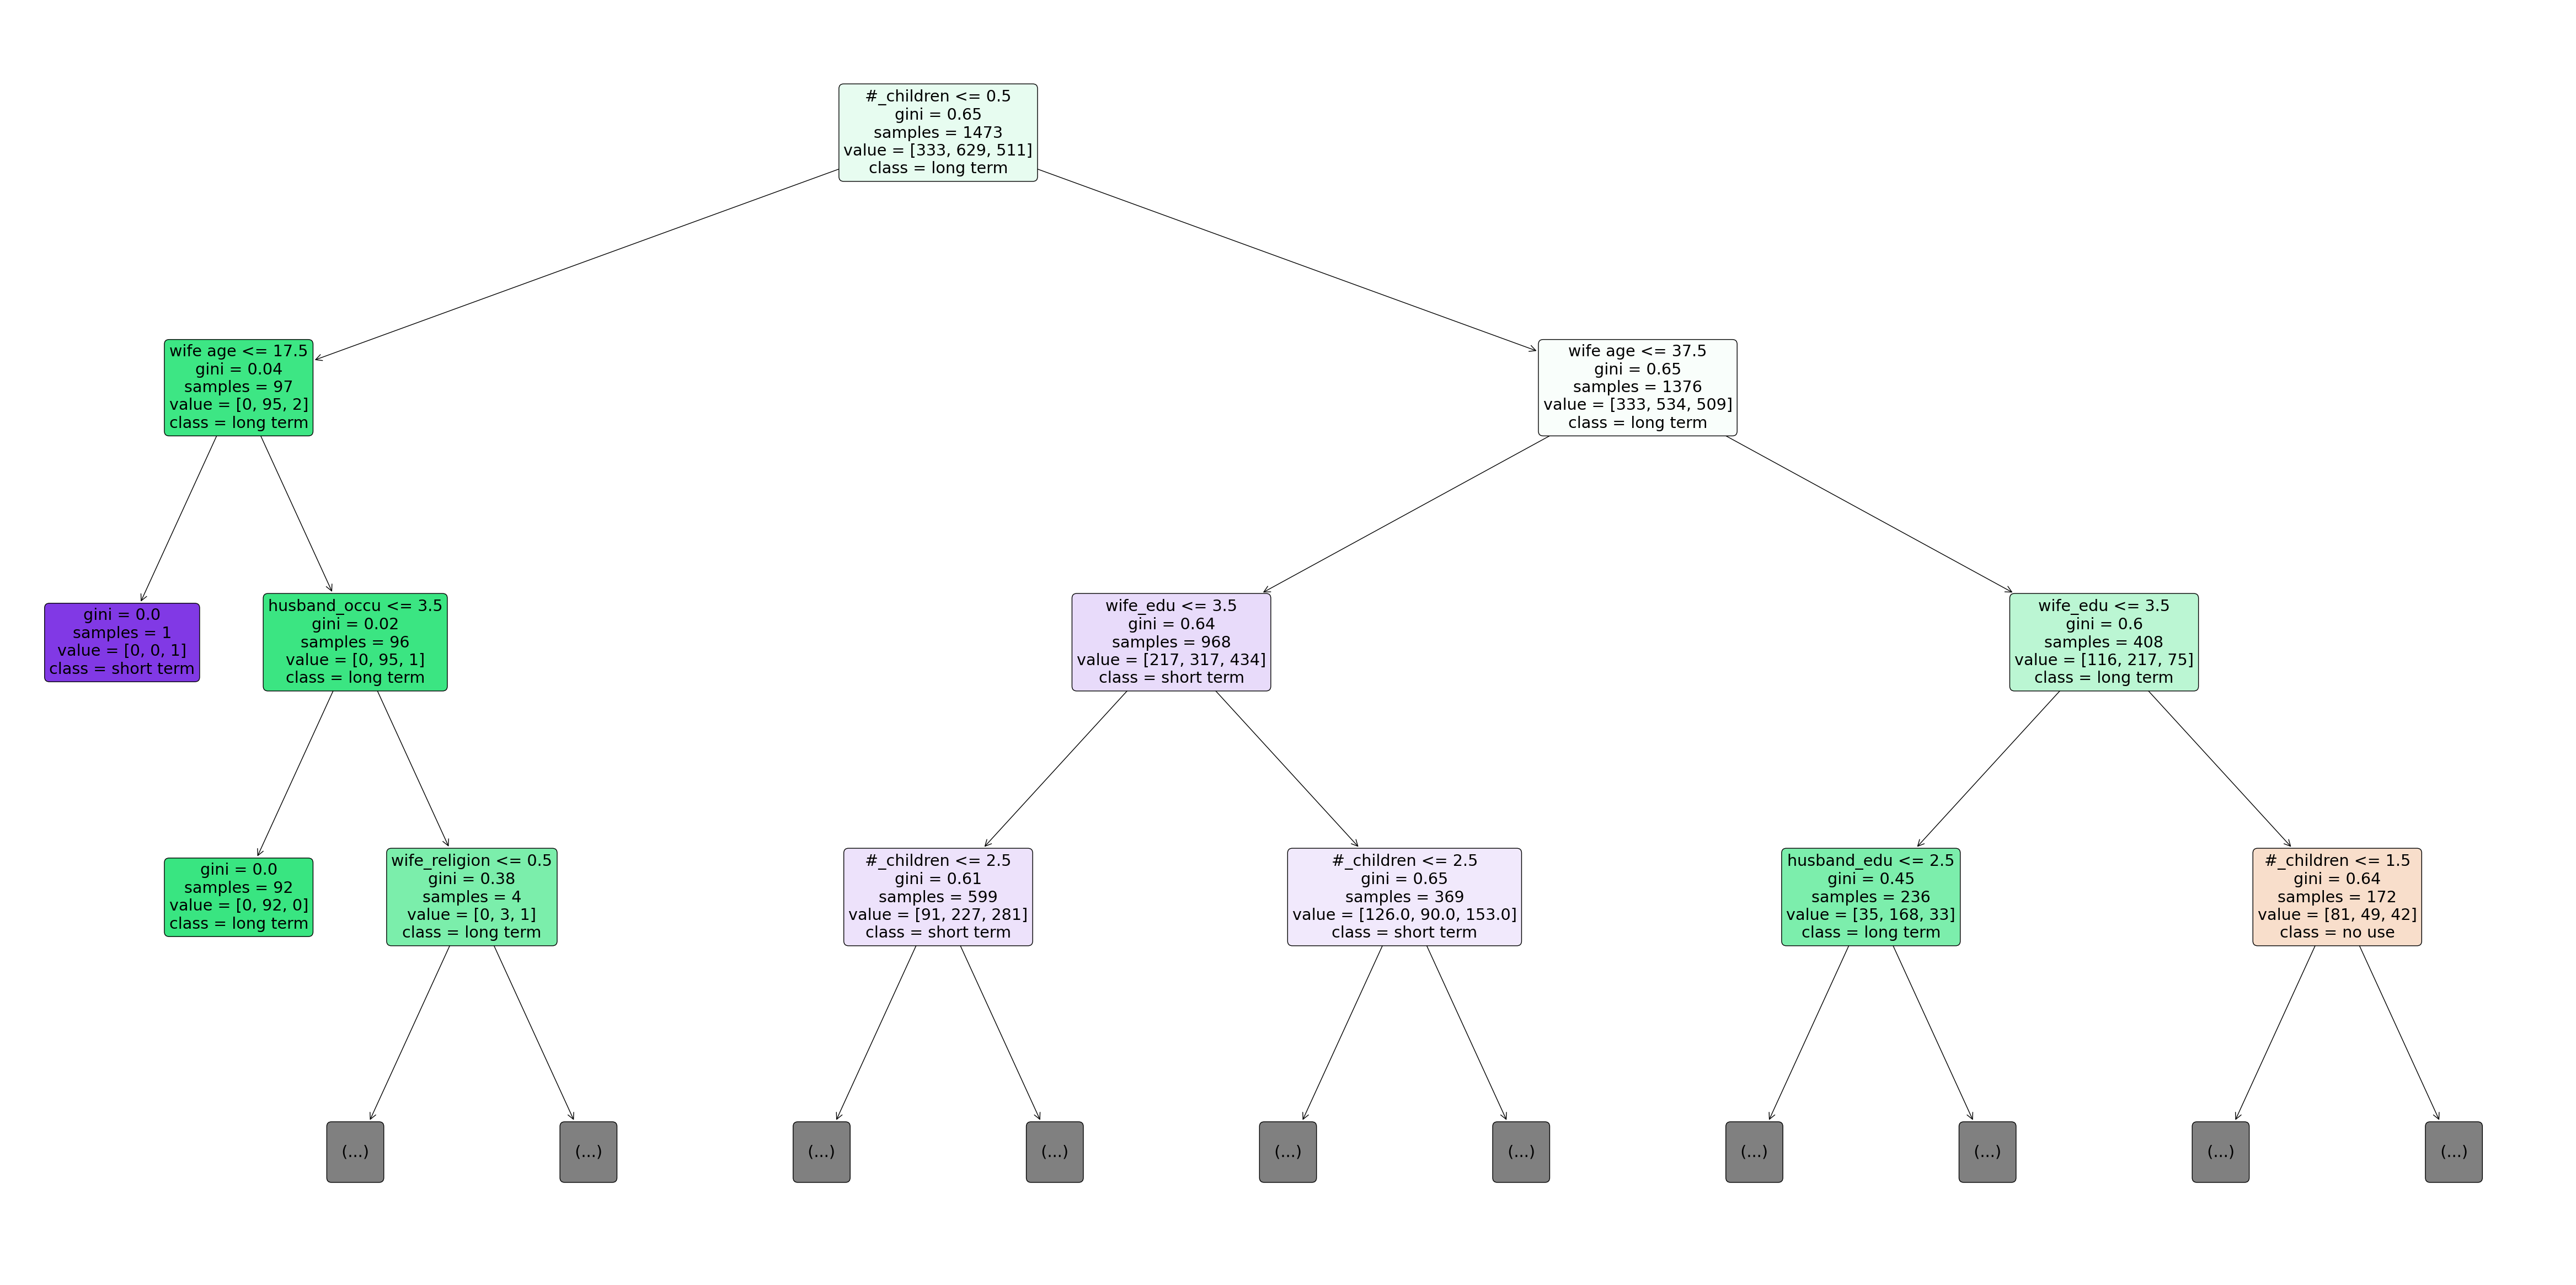

In [18]:
plt.figure(figsize=(60,30))
plot_tree(tree, feature_names=list(column_map.values())[:-1], class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3)
plt.show()

In [19]:
export_graphviz(tree, feature_names=list(column_map.values())[:-1], class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3, out_file=f"contraceptive_{crit}.dot")

## Stratifying

In [20]:
X_train, X_test = train_test_split(df, test_size=0.33, random_state=17, stratify=df['contraceptive_method'])
X_test

,wife age,wife_edu,husband_edu,#_children,wife_religion,wife_now_work,husband_occu,sol_index,media_expo,contraceptive_method
1096,24,3,4,2,1,1,2,4,0,no use
908,26,4,4,2,1,0,3,3,0,short term
299,26,4,4,1,1,1,1,4,0,no use
298,28,4,4,3,0,1,1,4,0,no use
303,24,2,4,2,1,1,3,4,0,no use
...,...,...,...,...,...,...,...,...,...,...
1125,42,3,3,5,1,1,2,2,0,no use
1454,31,3,4,5,1,1,1,4,0,short term
1453,28,1,3,5,1,1,3,4,0,short term
128,43,1,3,2,1,0,2,2,1,no use


In [21]:
tree.fit(df.drop('contraceptive_method', axis=1), df['contraceptive_method'])

DecisionTreeClassifier()

In [22]:
predicted = tree.predict(X_test.drop('contraceptive_method', axis=1))
predicted_proba = tree.predict_proba(X_test.drop('contraceptive_method', axis=1))
truth = np.array(X_test['contraceptive_method'])

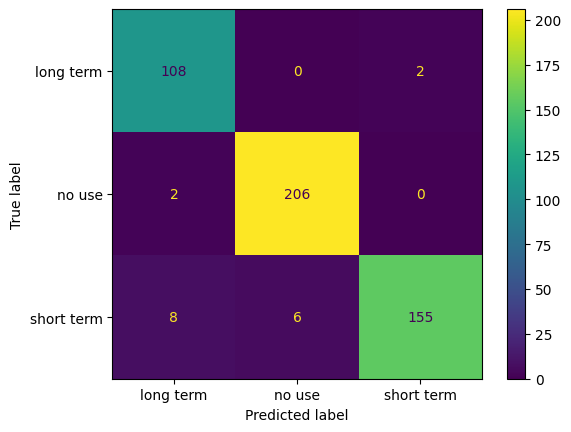

In [23]:
confusion = confusion_matrix(truth, predicted)
ConfusionMatrixDisplay.from_predictions(truth, predicted)
plt.savefig(f'Contraceptive_stratified_{crit}confusion')

In [24]:
report = classification_report(truth, predicted)
with open(f"contraceptive_stratified_{crit}report", 'w') as file:
    file.write(report)
print(report)

              precision    recall  f1-score   support

   long term       0.92      0.98      0.95       110
      no use       0.97      0.99      0.98       208
  short term       0.99      0.92      0.95       169

    accuracy                           0.96       487
   macro avg       0.96      0.96      0.96       487
weighted avg       0.96      0.96      0.96       487



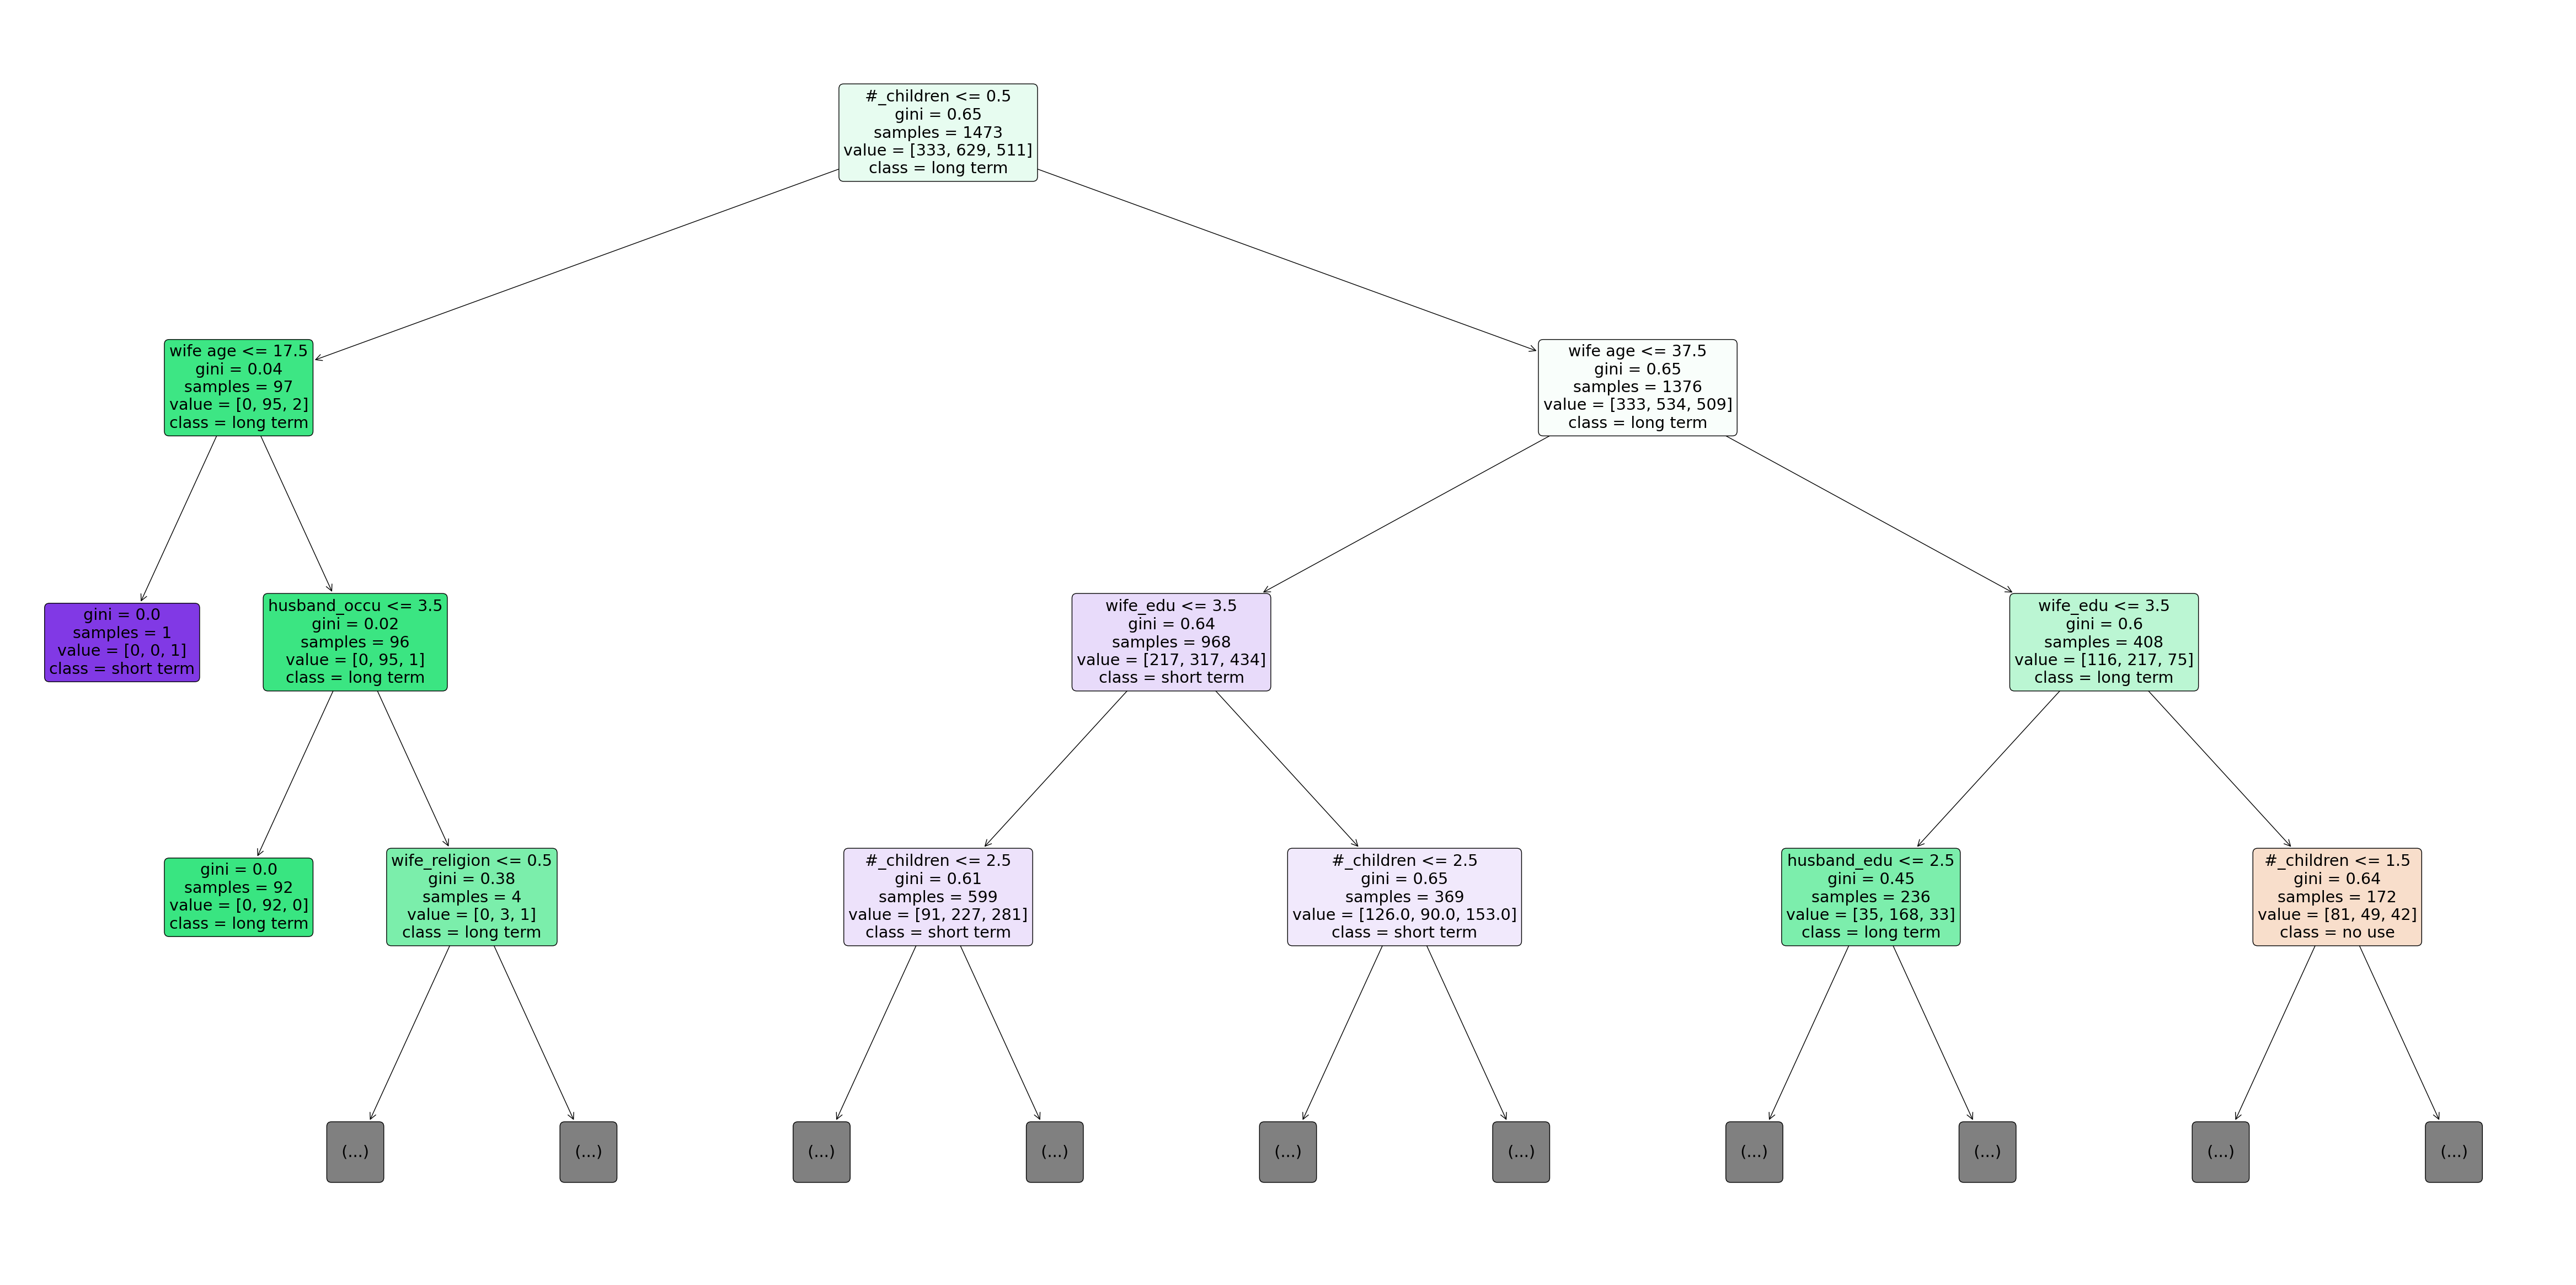

In [25]:
plt.figure(figsize=(60,30))
plot_tree(tree, feature_names=list(column_map.values())[:-1], class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3)
plt.show()

In [26]:
export_graphviz(tree, feature_names=list(column_map.values())[:-1], class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3, out_file=f"contraceptive_stratified_{crit}.dot")

## Contraceptive One-Hot

In [27]:
X = x.fit_transform(df.drop('contraceptive_method', axis=1))
onehot_categories = X.columns
X['contraceptive_method'] = df['contraceptive_method']
X

,wife age_16,wife age_17,wife age_18,wife age_19,wife age_20,wife age_21,wife age_22,wife age_23,wife age_24,wife age_25,...,husband_occu_2,husband_occu_3,husband_occu_4,sol_index_1,sol_index_2,sol_index_3,sol_index_4,media_expo_0,media_expo_1,contraceptive_method
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no use
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no use
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,short term
1469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,short term
1470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,short term
1471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,short term


In [28]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=17)
X_test

,wife age_16,wife age_17,wife age_18,wife age_19,wife age_20,wife age_21,wife age_22,wife age_23,wife age_24,wife age_25,...,husband_occu_2,husband_occu_3,husband_occu_4,sol_index_1,sol_index_2,sol_index_3,sol_index_4,media_expo_0,media_expo_1,contraceptive_method
1213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no use
1122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no use
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,long term
1359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,short term
1206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use


In [29]:
tree.fit(X_train.drop('contraceptive_method', axis=1), X_train['contraceptive_method'])

DecisionTreeClassifier()

In [30]:
predicted = tree.predict(X_test.drop('contraceptive_method', axis=1))
predicted_proba = tree.predict_proba(X_test.drop('contraceptive_method', axis=1))
truth = np.array(X_test['contraceptive_method'])

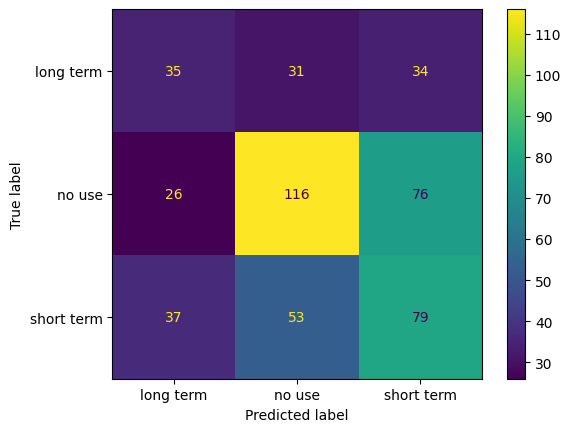

In [31]:
confusion = confusion_matrix(truth, predicted)
ConfusionMatrixDisplay.from_predictions(truth, predicted)
plt.savefig(f'Contraceptive_onehot_{crit}confusion')

In [32]:
report = classification_report(truth, predicted)
with open(f"contraceptive_onehot_{crit}report", 'w') as file:
    file.write(report)
print(report)

              precision    recall  f1-score   support

   long term       0.36      0.35      0.35       100
      no use       0.58      0.53      0.56       218
  short term       0.42      0.47      0.44       169

    accuracy                           0.47       487
   macro avg       0.45      0.45      0.45       487
weighted avg       0.48      0.47      0.47       487



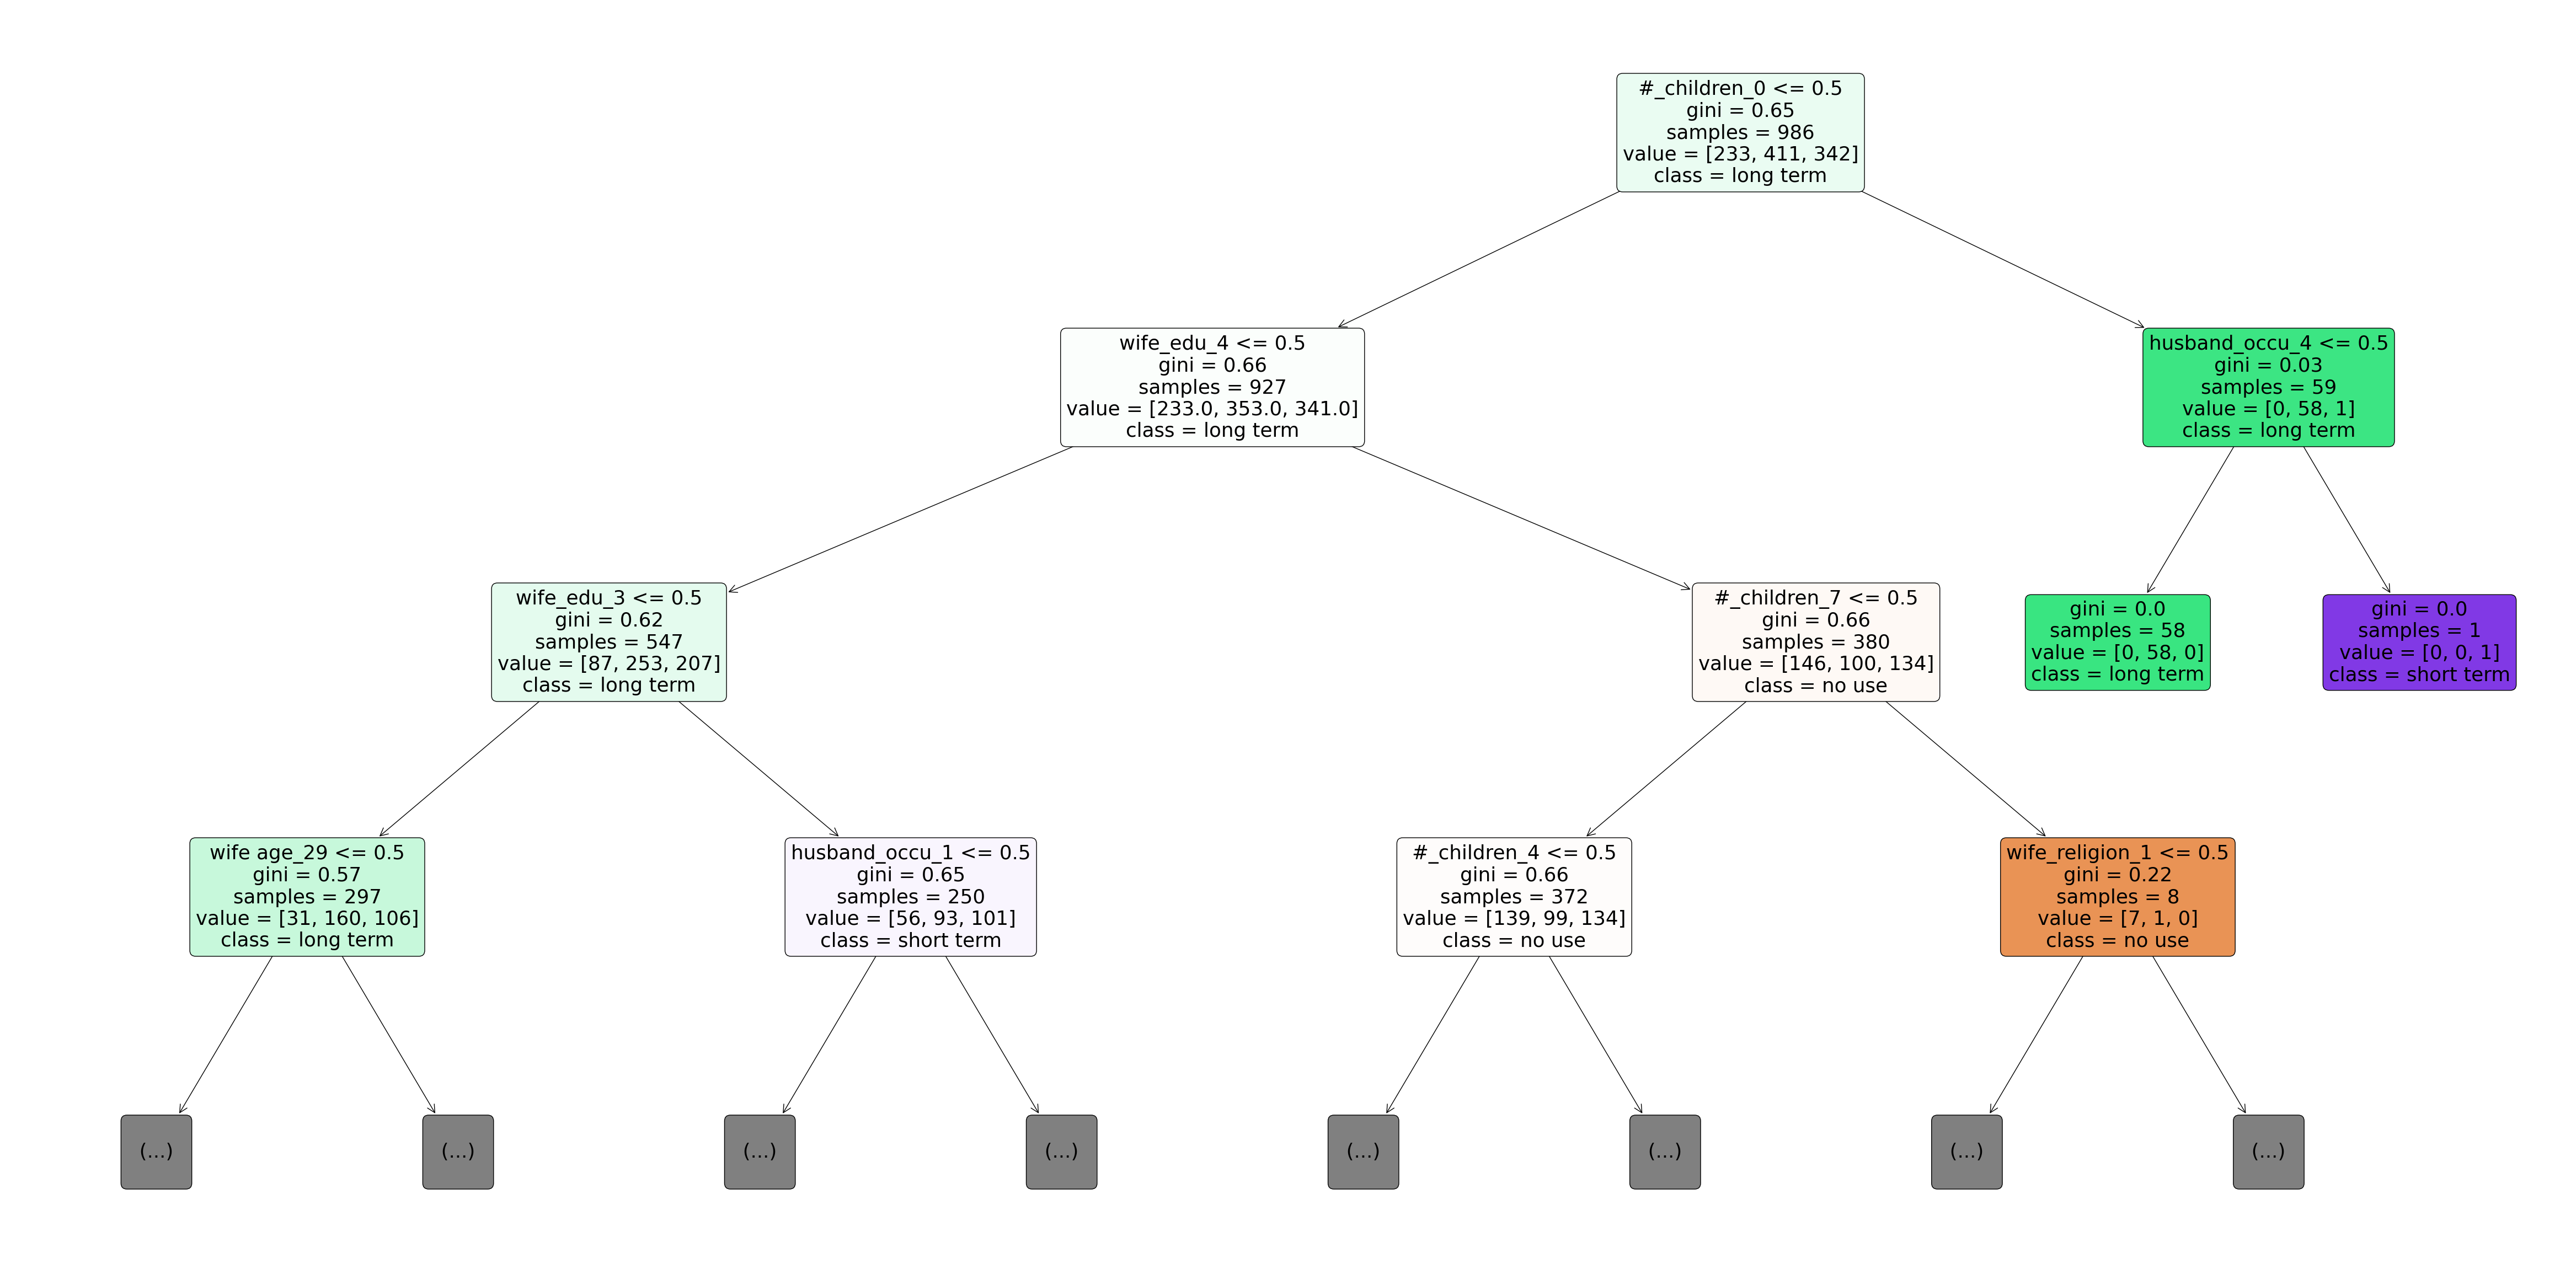

In [33]:
plt.figure(figsize=(60,30))
plot_tree(tree, feature_names=onehot_categories, class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3)
plt.show()

In [34]:
export_graphviz(tree, feature_names=onehot_categories, class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3, out_file=f"contraceptive_onehot_{crit}.dot")

### Stratifying

In [35]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=17, stratify=X['contraceptive_method'])
X_test

,wife age_16,wife age_17,wife age_18,wife age_19,wife age_20,wife age_21,wife age_22,wife age_23,wife age_24,wife age_25,...,husband_occu_2,husband_occu_3,husband_occu_4,sol_index_1,sol_index_2,sol_index_3,sol_index_4,media_expo_0,media_expo_1,contraceptive_method
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,short term
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no use
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,short term
1453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,short term
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no use


In [36]:
tree.fit(X_train.drop('contraceptive_method', axis=1), X_train['contraceptive_method'])

DecisionTreeClassifier()

In [37]:
predicted = tree.predict(X_test.drop('contraceptive_method', axis=1))
predicted_proba = tree.predict_proba(X_test.drop('contraceptive_method', axis=1))
truth = np.array(X_test['contraceptive_method'])

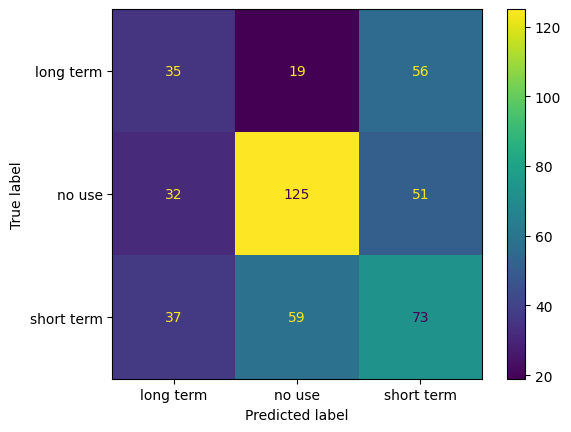

In [38]:
confusion = confusion_matrix(truth, predicted)
ConfusionMatrixDisplay.from_predictions(truth, predicted)
plt.savefig(f'Contraceptive_onehot_stratified_{crit}confusion')

In [39]:
report = classification_report(truth, predicted)
with open(f"contraceptive_onehot_stratified_{crit}report", 'w') as file:
    file.write(report)
print(report)

              precision    recall  f1-score   support

   long term       0.34      0.32      0.33       110
      no use       0.62      0.60      0.61       208
  short term       0.41      0.43      0.42       169

    accuracy                           0.48       487
   macro avg       0.45      0.45      0.45       487
weighted avg       0.48      0.48      0.48       487



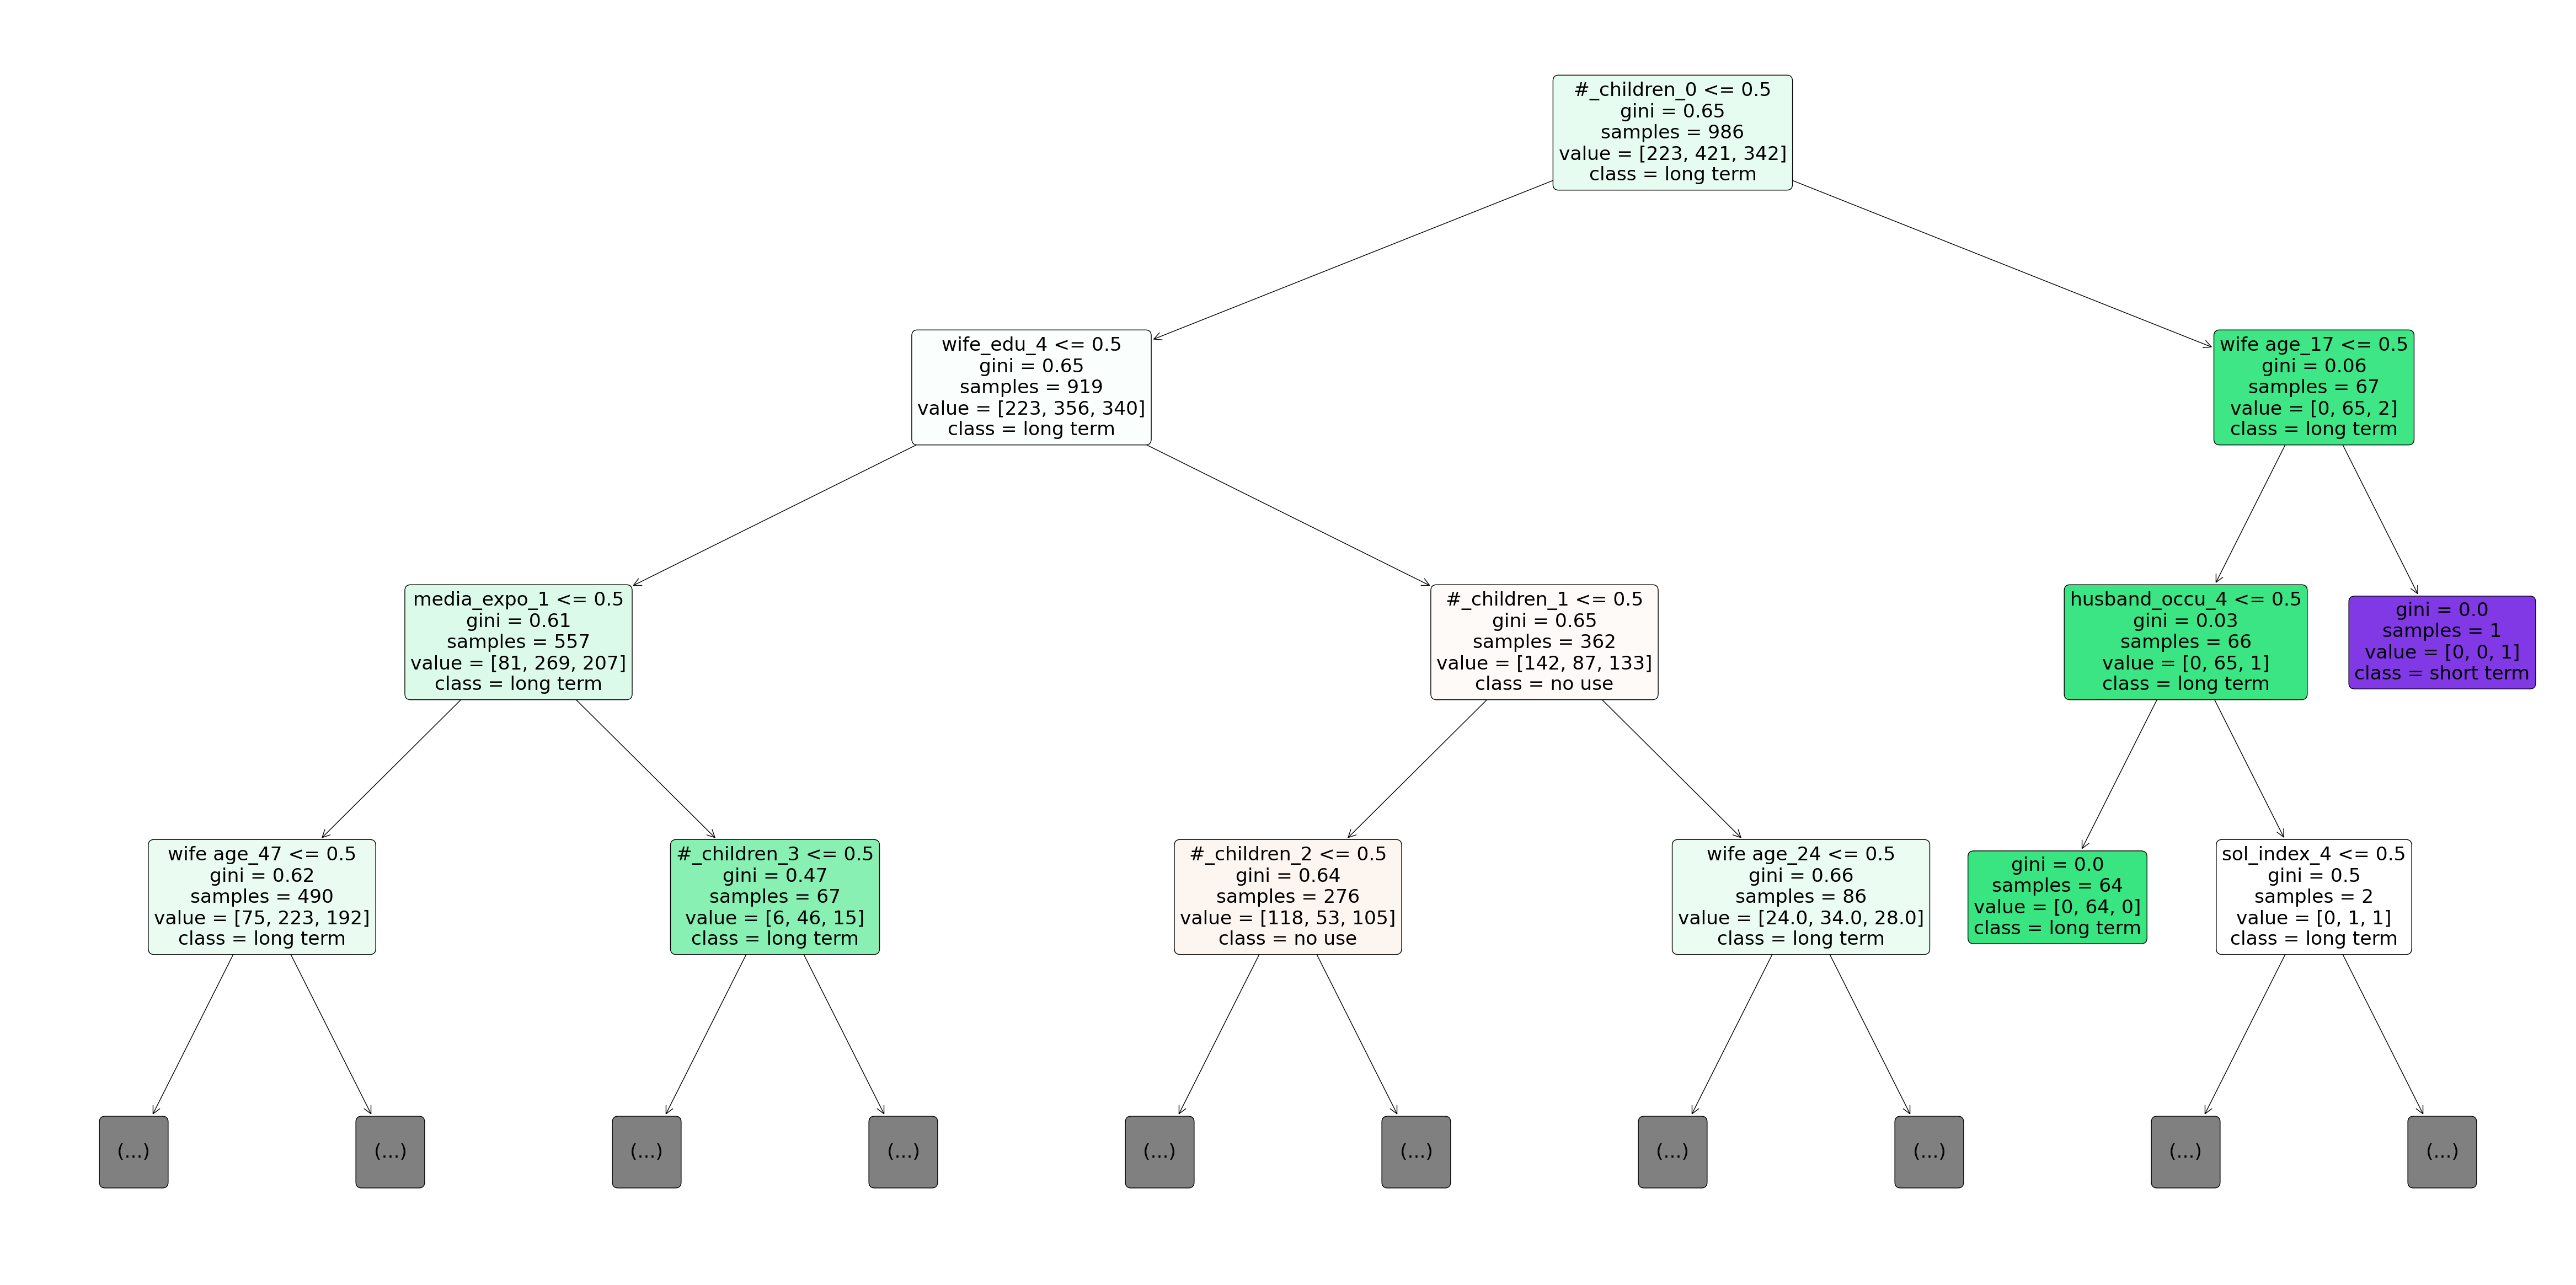

In [40]:
plt.figure(figsize=(60,30))
plot_tree(tree, feature_names=onehot_categories, class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3)
plt.show()

In [41]:
export_graphviz(tree, feature_names=onehot_categories, class_names=list(class_map.values()), filled=True, rounded=True, proportion=False, precision=2, max_depth=3, out_file=f"contraceptive_onehot_stratified_{crit}.dot")